In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime=data.drop(["Unnamed: 0"],axis=1)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
crime.isnull().sum()
# No null values

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xb378300dc0>,
 'caps': [<matplotlib.lines.Line2D at 0xb37831c4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb378300ac0>],
 'medians': [<matplotlib.lines.Line2D at 0xb37831cb80>],
 'fliers': [<matplotlib.lines.Line2D at 0xb37831ce80>],
 'means': []}

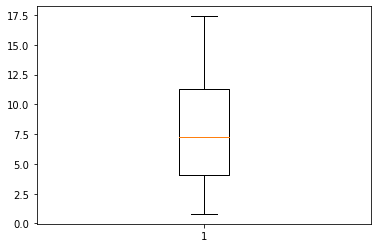

In [5]:
plt.boxplot(crime.Murder,vert=True)
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0xb3783b73d0>,
 'caps': [<matplotlib.lines.Line2D at 0xb3783b7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0xb3783b7070>],
 'medians': [<matplotlib.lines.Line2D at 0xb3783c1190>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3783c1490>],
 'means': []}

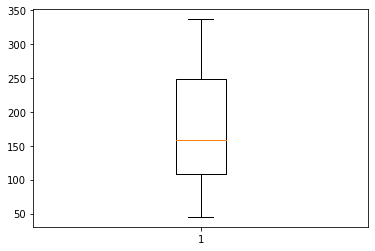

In [6]:
plt.boxplot(crime.Assault,vert=True)
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0xb3784172b0>,
 'caps': [<matplotlib.lines.Line2D at 0xb378417970>,
 'boxes': [<matplotlib.lines.Line2D at 0xb378408f10>],
 'medians': [<matplotlib.lines.Line2D at 0xb378423070>],
 'fliers': [<matplotlib.lines.Line2D at 0xb378423370>],
 'means': []}

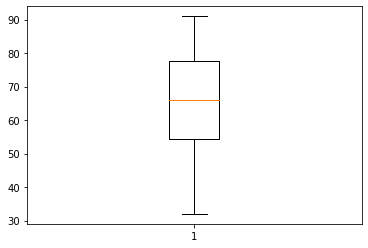

In [7]:
plt.boxplot(crime.UrbanPop,vert=True)
# No outliers

{'whiskers': [<matplotlib.lines.Line2D at 0xb378478160>,
 'caps': [<matplotlib.lines.Line2D at 0xb378478820>,
 'boxes': [<matplotlib.lines.Line2D at 0xb37846adc0>],
 'medians': [<matplotlib.lines.Line2D at 0xb378478ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0xb378483220>],
 'means': []}

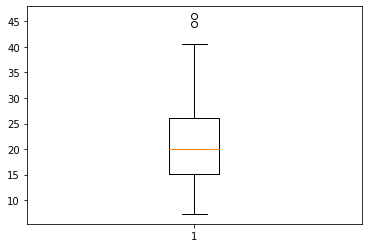

In [8]:
plt.boxplot(crime.Rape,vert=True)
# Two outliers, thus treat them

In [9]:
Q1=crime["Rape"].quantile(0.25)
Q3=crime["Rape"].quantile(0.75)
IQR=Q3-Q1
LW=Q1-1.5*IQR
UW=Q3+1.5*IQR
crime=crime[crime["Rape"]<UW]
crime.head()
# Treating outliers

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


{'whiskers': [<matplotlib.lines.Line2D at 0xb3784de100>,
 'caps': [<matplotlib.lines.Line2D at 0xb3784de7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xb3784cfd60>],
 'medians': [<matplotlib.lines.Line2D at 0xb3784dee80>],
 'fliers': [<matplotlib.lines.Line2D at 0xb3784e61c0>],
 'means': []}

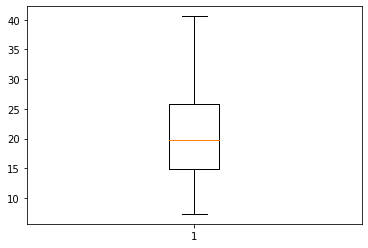

In [10]:
plt.boxplot(crime.Rape,vert=True)
# outliers are removed

In [11]:
crime["sn"]=np.arange(len(crime))
crime.head()
# To check for scatterplot whether the datapoints are linearly seperable or not

,Murder,Assault,UrbanPop,Rape,sn
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,4


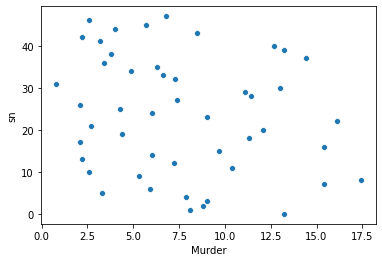

In [12]:
sns.scatterplot(data=crime,x="Murder",y="sn")
# All datapoints are linearly seperable and less datapoints are there thus we use agglomorative clustering

In [14]:
crime.drop(["sn"],axis=1,inplace=True)
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7


In [15]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime)


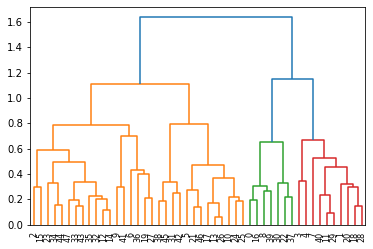

In [23]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [27]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [28]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [30]:
df_norm['h_clusterid'] = pd.Series(y_hc)
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.417417,2.0
2,0.439759,0.852740,0.813559,0.711712,1.0
3,0.481928,0.496575,0.305085,0.366366,3.0
4,0.493976,0.791096,1.000000,1.000000,3.0
5,0.427711,0.544521,0.779661,0.942943,0.0
6,0.150602,0.222603,0.762712,0.114114,1.0
7,0.307229,0.660959,0.677966,0.255255,3.0
8,0.879518,0.993151,0.813559,0.738739,2.0
9,1.000000,0.568493,0.474576,0.555556,1.0
10,0.271084,0.003425,0.864407,0.387387,0.0


In [38]:
result=crime.groupby(df_norm.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0.0,8.223077,168.153846,72.307692,23.469231
1.0,7.747059,167.235294,61.352941,19.441176
2.0,10.442857,203.142857,63.714286,21.971429
3.0,5.122222,150.888889,65.888889,17.255556


From the above result we can conclude that,

cluster 2.0 can be seen as the highest crime city.
cluster 3.0 can be seen as the lowest crime city.
